Ответы:
1) 207
2) 1166
3) With mean
4) 0
5) 0.005
6) 0.35

In [49]:
import pandas as pd
import numpy as np

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-20 14:50:26--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 1423529 (1,4M) [text/plain]
Сохранение в: «housing.csv»

housing.csv         100%[===================>]   1,36M  2,78MB/s    за 0,5s    

2022-09-20 14:50:27 (2,78 MB/s) - «housing.csv» сохранён [1423529/1423529]



In [50]:
df = pd.read_csv('housing.csv')

In [51]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

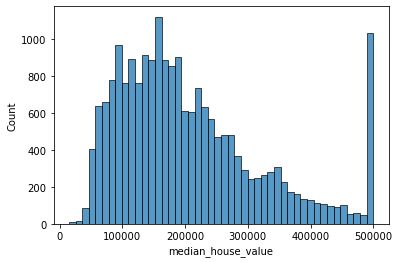

In [53]:
sns.histplot(df.median_house_value)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

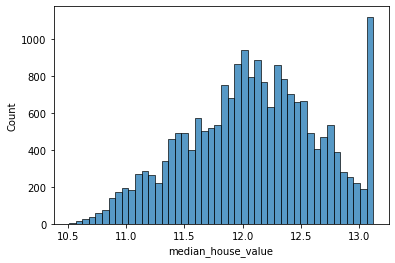

In [54]:
sns.histplot(np.log1p(df.median_house_value)[np.log1p(df.median_house_value) > 10.5])

In [55]:
new_df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
new_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [56]:
new_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [57]:
new_df.population.median()

1166.0

In [251]:
n = len(new_df)

In [252]:
idx = np.arange(n)

In [253]:
np.random.seed(9)

In [254]:
np.random.shuffle(idx)

In [255]:
idx

array([20558, 11430,  2656, ...,  5014,  9979,   501])

In [256]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [257]:
n, n_train, n_val, n_test

(20640, 12384, 4128, 4128)

In [258]:
df_train = new_df.iloc[idx[: n_train]]
df_val = new_df.iloc[idx[n_train: n_train + n_val]]
df_test = new_df.iloc[idx[n_train + n_val:]]

In [259]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [260]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [261]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [262]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [263]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])

In [232]:
new_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [233]:
base = list(new_df.columns)
base.remove('median_house_value')
base

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [180]:
frequentest = new_df.total_bedrooms.mean()
frequentest

537.8705525375618

In [234]:
def prepare_X(df):
    df = df.copy()
    
    df_num = df[base]
    
    X = df_num.fillna(0).values
    
    return X

In [235]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX += r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [236]:
def rmse(y, y_pred):
    se = (y_pred - y) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [267]:
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred).round(2)

0.35

In [204]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.32953303652307947

- with filling 0 rmse: 0.32953303652307947
+ with filling mean rmse: 0.3290194136280688

In [200]:
rmses = {}
rs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in rs:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    rmses[r] = rmse(y_val, y_pred).round(2)
rmses

{0: 0.33,
 1e-06: 0.33,
 0.0001: 0.33,
 0.001: 0.33,
 0.01: 0.33,
 0.1: 0.33,
 1: 0.33,
 5: 0.34,
 10: 0.34}

smallest r: 0

In [205]:
def prepare_X(df):
    df = df.copy()
    
    df_num = df[base]
    
    X = df_num.fillna(0).values
    
    return X

def train_linear_regression(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [214]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
results = list()

In [215]:
for seed in seeds:
    np.random.seed(seed)

    np.random.shuffle(idx)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = new_df.iloc[idx[: n_train]]
    df_val = new_df.iloc[idx[n_train: n_train + n_val]]
    df_test = new_df.iloc[idx[n_train + n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    base = list(new_df.columns)
    base.remove('median_house_value')

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    results.append(rmse(y_val, y_pred))

In [218]:
np.std(results).round(3)

0.006